# Unsupervised Learning

## Due Tuesday, June 7 (at 8 AM)

In this lab, you will use clustering and dimensionality reduction to explore the College Scorecard data set.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/data/collegescorecard/merged_2011_PP.csv", encoding="ISO-8859-1")

## Question 1 (30 points)

Take the following quantitative variables from the data:
- Median SAT Math (`SATMTMID`)
- Median SAT Verbal (`SATVRMID`)
- Admissions Rate (`ADM_RATE`)
- Percentage of first-generation college students (`PAR_ED_PCT_1STGEN`)
- Percentage of white students (`UGDS_WHITE`)
- Percentage of black students (`UGDS_BLACK`)
- Percentage of Hispanic students (`UGDS_HISP`)
- Percentage of Asian students (`UGDS_ASIAN`)

Use $k$-means clustering to find clusters in the data based on these variables. You will need to determine a suitable value of $k$. Describe how you did this. (Many answers are possible here.) Don't forget to standardize your variables to make sure that all variables are on the same scale!

Then, look at some examples of colleges in each cluster. Can you assign a qualitative label to each cluster?

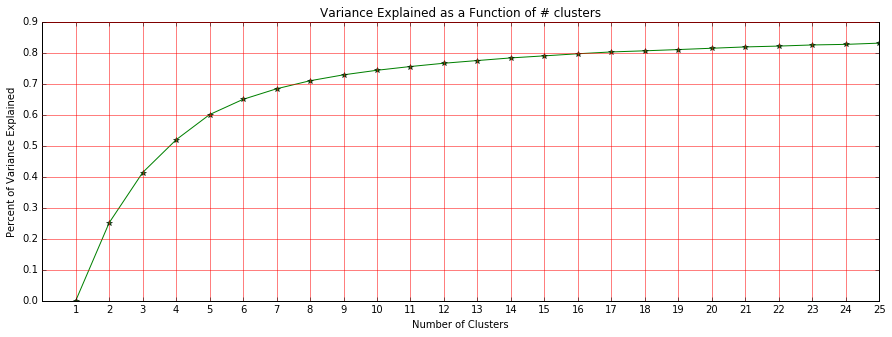

In [2]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
### we'll graph the amount of variance explained by our model versus number of centroids to determing best number of clusters
X = data[["SATMTMID","SATVRMID", "ADM_RATE", "PAR_ED_PCT_1STGEN", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN", "INSTNM", "STABBR", "region"]]
X = X[X.PAR_ED_PCT_1STGEN != "PrivacySuppressed"]
X = X.dropna()
breakdown = X.copy(deep = True)
X = X.drop("INSTNM", 1)
X = X.drop("STABBR", 1)
X = X.drop("region", 1)
X = pd.DataFrame(preprocessing.scale(X))
noschool =  X.copy(deep = True)
from scipy.spatial.distance import cdist, pdist
cluster_range = range(1,26)
kmeans_var = [KMeans(n_clusters = k).fit(X) for k in cluster_range]
centroids = [l.cluster_centers_ for l in kmeans_var]
## calculate distance from each point to cluster center
k_distance = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(kd,axis=1) for kd in k_distance]
## total within cluster (group) sum of squares
within_SS = [sum(d**2) for d in dist]
## the total sum of squares
total_SS = sum(pdist(X) ** 2) / X.shape[0]

## between cluster sum of squares
betweenSS = total_SS - within_SS

variance_explained = betweenSS / total_SS
variance_explained
centers = range(1,26)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(centers, variance_explained, "-g*")
plt.grid(b = True, which = "major", color= 'r' , linestyle = "-")
plt.xticks(centers)
plt.title("Variance Explained as a Function of # clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Percent of Variance Explained")

### Based on the graph in the output I would go with around 15 clusters. Technically more would increase amount of variabliity
### explained but 6 is a lower dimension and has 80% of the variablity explained therfore I would go with 15. Haaving too many
### clusters would make our interpretion useless. 




      SATMTMID  SATVRMID  ADM_RATE PAR_ED_PCT_1STGEN  UGDS_WHITE  UGDS_BLACK  \
16       363.0     382.0    0.5802       0.464758877      0.3894      0.5444   
32       598.0     481.0    0.6756        0.47261236      0.4380      0.4593   
196      530.0     485.0    0.6687       0.494117647      0.6186      0.3031   
654      435.0     443.0    0.8660       0.472750317      0.4355      0.2209   
660      465.0     460.0    0.5668       0.426490985      0.2777      0.3736   
698      415.0     420.0    0.7737        0.54085962      0.1586      0.0786   
723      420.0     420.0    0.2028        0.44595822      0.5203      0.4257   
...        ...       ...       ...               ...         ...         ...   
3632     460.0     425.0    0.7500       0.610921502      0.4966      0.4592   
3637     450.0     435.0    0.6978       0.424278846      0.6110      0.3061   
3683     482.0     457.0    0.4820       0.571217057      0.5429      0.3169   
3751     420.0     430.0    1.0000      

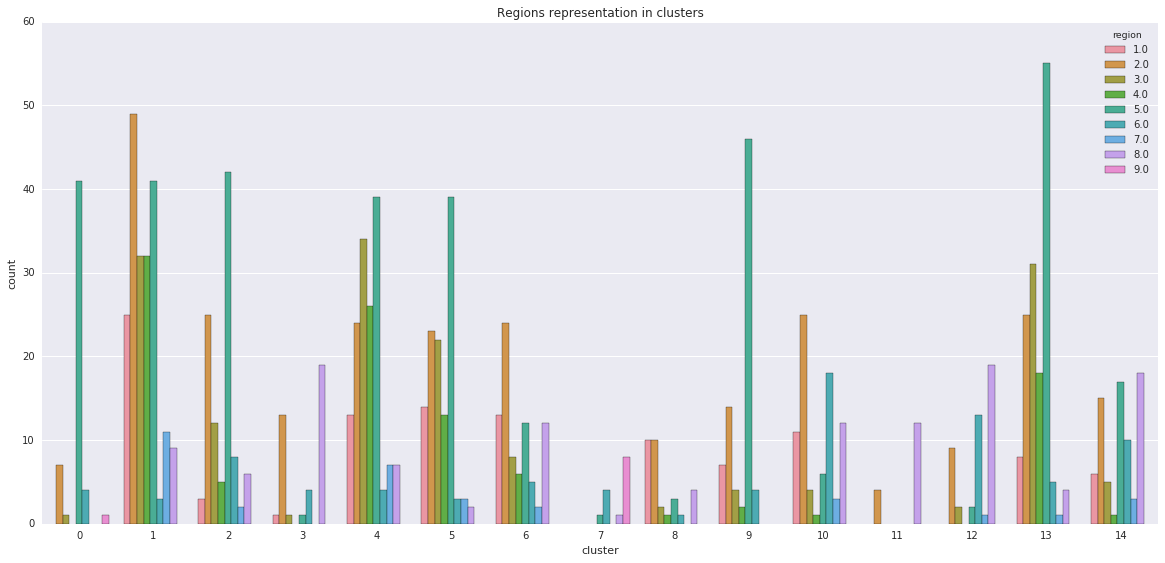

In [3]:
import seaborn as sns
model = KMeans(n_clusters= 15).fit(noschool)
breakdown['cluster'] = model.labels_
print(breakdown[model.labels_ == 9 ])
plt.figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = 'cluster', hue = "region",  data = breakdown)
plt.title("Regions representation in clusters")



I looked at each cluster and didn't see any distinct classifications. I did notice however that some clusters seemed to have more regional representations. To test this I made the countplot above to see what regions codes where in each cluster. According to the plot, however, there is no disntict pattern. 

## Question 2 (30 points)

Run principal components analysis (PCA) on your data. Make a scatterplot showing the loadings on the first two principal components. Give each cluster from above a different color. Use this scatterplot to judge the quality of the clustering from Question 1. (But bear in mind that you're only looking at 2 dimensions of the original 8-dimensional data set, so this scatterplot doesn't tell the complete story.)

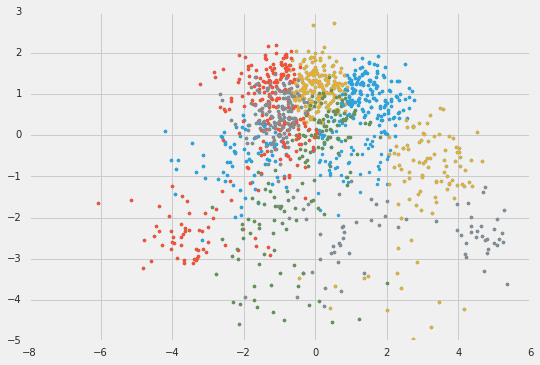

In [4]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X)
scores = pca_model.transform(X)
pca_model.fit_transform(X)

with plt.style.context("fivethirtyeight"):
    plt.plot(scores[:, 0], scores[:, 1], '.')
    for i in range(0,14):
        plt.plot(scores[model.labels_ == i, 0], scores[model.labels_ == i, 1], '.')

I feel as though the model grabbed some of the cluster's pretty well. The colored regions seem like reasonable clusters.  